## **匯入 scikit-learn 套件**
### **使用 `sklearn` 的資料集**
- 使用 `import` 匯入 `sklearn` 套件中的資料集。
    (如果尚未安裝，可以使用 `pip install sklearn` 安裝)
- 使用的是其中的 `datasets.load_digits()` (digits dataset) 資料集。是一個常用來練習機器學習的資料集，用作分類 (classification) 的題型。
- 每個資料點 (datapoint) 都是一個 8x8 的數字圖像 (image of a digit)。
    <p><table align="left">
        <tr>
            <td><b>類別數</b></td>
            <td>10</td>
        </tr>
        <tr>
            <td><b>每個類別中的樣本數</b></td>
            <td>~180</td>
        </tr>
        <tr>
            <td><b>總樣本數</b></td>
            <td>1797</td>
        </tr>
        <tr>
            <td><b>Dimensionality</b></td>
            <td>64</td>
        </tr>
        <tr>
            <td><b>特徵</b></td>
            <td>0-16 的整數 (用來表示色階)</td>
        </tr>
    </table></p>

In [46]:
from sklearn import datasets
digits = datasets.load_digits()

### **查看資料**
根據上面輸出資料可以知道，資料集是以 `dict` (dictionary, 字典) 的形式進行儲存的。是由 keys 跟 values 的對應組成的。

In [47]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

我們可以進一步去看資料集的內容及屬性有哪些：
- 我們可以使用 `.key()` 的 method 來看看資料中有哪些資料屬性。
- 使用 `.images()` 會回傳原始圖片檔 (raw image data)，可以看看資料集中的digit images長怎樣。

In [48]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [49]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

### **使用 `matplotlib` 來呈現 images**
從上面可以看到，`datasets.load_digits()` (digits dataset) 資料集當中的數字圖像，是以 0-16 的數值呈現的。

我們可以透過 `matplotlib` 來將數字直接以色塊的方式呈現。

使用 `matplotlib.pyplot.subplot()` 來建立一組空的 subplots
- `subplot()` 會回傳一組圖 (figure) 與 axes
- axes 可以用來承接一組物件。在這邊，axes 被用來承接 image (見 `for` loop 內容)
    ```python
    for ax, image, label in zip(axes, digits.images, digits.target):
        ax.imshow(image, cmap=plt.cm.gray_r)
    ```
- `imshow()` 用來呈現圖片，使用 `cmap` (color map) 可以用來指定數值對應到的色階型態。
    - `plt.cm.gray` 是灰階。
    - `plt.cm.gray_r` 是反向 (reverse) 的灰階。
- `.set_title()` method 用來指定圖的標題，這裡為 axes 中的 subplot 都做了一個 title。

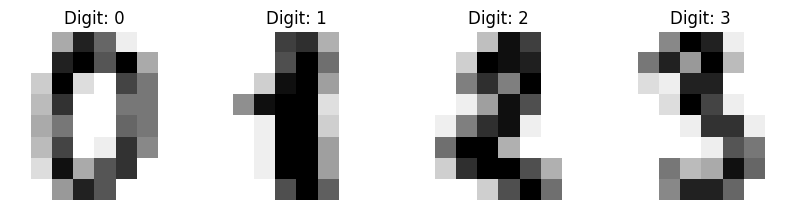

In [50]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Digit: {}'.format(label))
    ax.set_axis_off()

In [51]:
axes

array([<Axes: title={'center': 'Digit: 0'}>,
       <Axes: title={'center': 'Digit: 1'}>,
       <Axes: title={'center': 'Digit: 2'}>,
       <Axes: title={'center': 'Digit: 3'}>], dtype=object)

#### **`zip()` 的功能**
`zip()` 的功能在這邊是將物件一組一組的綑綁起來。具體實現方法像是下面這樣。

In [52]:
alph = ['a', 'b', 'c']
rom = ['i', 'ii', 'iii']
list(zip(alph, rom))

[('a', 'i'), ('b', 'ii'), ('c', 'iii')]

## **模型建立**
### **建立訓練集與測試集**
- 可以使用 `sklearn.model_selection.train_test_split()` function 來建立訓練與測試集。
- 使用 `test_size` argument 來決定要把來源資料分多少 \% 作為測試集。
- 使用 `shuffle`。

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    digits.data, digits.target, digits.images, test_size=0.2, shuffle=True)

資料集的shape很重要，可以使用 `.shape` 來查看其 shape 屬性。

In [54]:
print(X_train.shape, X_test.shape)

(1437, 64) (360, 64)


### **引入支持向量機 (SVM)**
- 使用 `sklearn.svm.SVC()`， `SVC()` 是一個可以支援分類 (classification) 題目的支持向量機 (Support Vector Machines)。

In [55]:
from sklearn import svm
clf = svm.SVC()

In [56]:
# 可以使用 help() 來查看 SVC 的說明
help(svm.SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

#### **擬合訓練集**
- 使用 `fit()` method 來擬合訓練集的 features 跟 labels。

In [57]:
clf.fit(X_train, y_train)

SVC()

#### **進行預測**
- 使用擬合好的模型，與測試集中的 features，來預測 labels。
- 使用 `predict()` method 進行預測。

In [58]:
y_pred = clf.predict(X_test)

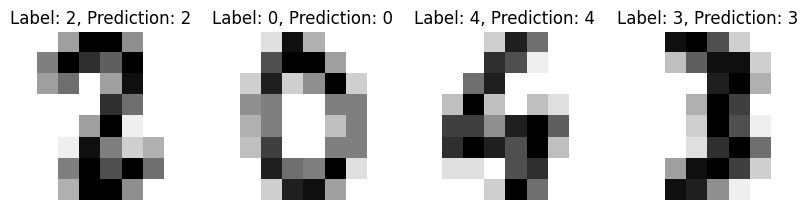

In [59]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label, predicted in zip(axes, img_test, y_test, y_pred):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Label: {}, Prediction: {}'.format(label, predicted))
    ax.set_axis_off()

#### **評估預測結果 / 模型好壞**
- 對於這種分類問題，我們可以使用 `sklearn.metrics.classification_report()` function 來看模型預測狀況指標。

In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.97        35
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        24
           4       1.00      0.98      0.99        41
           5       1.00      0.95      0.97        38
           6       0.97      1.00      0.99        39
           7       1.00      1.00      1.00        31
           8       0.93      0.88      0.90        32
           9       0.90      0.95      0.92        37

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.97       360
weighted avg       0.98      0.97      0.97       360

